# Prep: Class `Standardizer`

In [0]:
import numpy as np
#added
class standardizer:
  def __init__(self):
      self.row_scale_params = []
      
  def standardize(self, matrix):
    N = matrix.shape[0]
    result = np.empty( matrix.shape )    
    # run through the lines
    for i in range( N ):
      row = matrix[i,:]

      # Compute scaling parameters...
      mean = np.mean(row)
      std = np.std(row)

      print(f"Row {i} : Row = {row} Mean = {mean} Std = {std}")
      # Handle std = 0 case
      if std < 1E-6:
        std = 1

      # and save
      self.row_scale_params.append( [mean, std] )
           
      # add the row to the output
      result[i, :] = np.array( (row - mean) / std  )

    return result

  def check(self, matrix):
    N = matrix.shape[0]
   
    for i in range( N ):
      row = matrix[i,:]

      # Compute scaling parameters...
      mean = np.mean(row)
      std = np.std(row)
      print(f"Row {i} : Mean = {mean}, Std = {std}")

# Test
X  = np.array([[1], [1]])
X  = np.array( [[0.,1.], [0.,1.]] ) 
X  = np.array( [[0.,1., 2.0], [0.,1., 2.0]] )
standardizer = standardizer()

M = standardizer.standardize( X )
print(f"In \n {X}")
print(f"Out\n {M}")

standardizer.check( M )



Row 0 : Row = [0. 1. 2.] Mean = 1.0 Std = 0.816496580927726
Row 1 : Row = [0. 1. 2.] Mean = 1.0 Std = 0.816496580927726
In 
 [[0. 1. 2.]
 [0. 1. 2.]]
Out
 [[-1.22474487  0.          1.22474487]
 [-1.22474487  0.          1.22474487]]
Row 0 : Mean = 0.0, Std = 0.9999999999999999
Row 1 : Mean = 0.0, Std = 0.9999999999999999


# LANET: Add Standardizer
We just *add* the standardizer to our LANET code. No changes on other code.

In [0]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import metrics

class standardizer:
  def __init__(self):
      self.row_scale_params = []
      
  def standardize(self, matrix):
    N = matrix.shape[0]
    result = np.empty( matrix.shape )    
    # run through the lines
    for i in range( N ):
      row = matrix[i,:]

      # Compute scaling parameters...
      mean = np.mean(row)
      std = np.std(row)

      print(f"Row {i} : Row = {row} Mean = {mean} Std = {std}")
      # Handle std = 0 case
      if std < 1E-6:
        std = 1

      # and save
      self.row_scale_params.append( [mean, std] )
           
      # add the row to the output
      result[i, :] = np.array( (row - mean) / std  )

    return result

  def check(self, matrix):
    N = matrix.shape[0]
   
    for i in range( N ):
      row = matrix[i,:]

      # Compute scaling parameters...
      mean = np.mean(row)
      std = np.std(row)
      print(f"Row {i} : Mean = {mean}, Std = {std}")

def get_data( data_variant ):
  if (data_variant == "D2_N1_Y1"):
    X  = np.array([[1], [1]])
    y_true =np.array( [[22]] )

  elif (data_variant == "D2_N2_Y1"):
    X  = np.array( [[0.,1.], [0.,1.]] ) 
    y_true = np.array( [[0., 7.]] )

  elif (data_variant == "D2_N3_Y1"):
    X  = np.array( [[0.,1., 2.0], [0.1, 0.2, 0.3]] ) 
    y_true = np.array( [[10., -11., -15.0]] )

  elif (data_variant == "D2_N3_Y1_UNSCALED"):
    X  = np.array( [[0.,10., 200.0], [0.,1., 2.0]] ) 
    y_true = np.array( [[10., -11., -15.0]] )

  else: 
    raise Exception(f'Unkown datasource:  {data_variant}')

  return(X, y_true)

def activation(z, act_func):
    global _activation
    if act_func == 'relu':
       return np.maximum(z, np.zeros(z.shape))
    
    elif act_func == 'sigmoid':
      return 1.0/(1.0 + np.exp( -z ))

    elif act_func == 'linear':
        return z
    else:
        raise Exception('Activation function is not defined.')


def get_dactivation(A, act_func):
    if act_func == 'relu':
        return np.maximum(np.sign(A), np.zeros(A.shape)) # 1 if backward input >0, 0 otherwise; then diaganolize

    elif act_func == 'sigmoid':
        h = activation(A, 'sigmoid')
        return h *(1-h)

    elif act_func == 'linear':
        return np.ones(A.shape)

    else:
        raise Exception('Activation function is not defined.')

def loss(y_true, y_predicted, loss_function='mse'):
   if loss_function == 'mse':
      return metrics.mean_squared_error( y_true, y_predicted)
   else:
      raise Exception('Loss metric is not defined.')


def get_dZ_from_loss(y, y_predicted, metric):
    if metric == 'mse':
        return y_predicted - y
    else:
        raise Exception('Loss metric is not defined.')
           
class layer:
  def __init__(self,input_dim, output_dim, activation='relu'):    
    self.activation = activation
    self.input_dim = input_dim
    self.output_dim = output_dim # is this needed?? TODO
    if input_dim > 0:
      self.b = np.ones( (output_dim,1) )       
      self.W = np.ones( (output_dim, input_dim) )
      #self.W = np.random.randn(output_dim, input_dim) * np.sqrt(2/input_dim) 
    
    self.A = np.zeros( (output_dim,1) ) # added: we temp. store for A
  
  def setWeight(self, W ):
    self.W = W
    
  def setBias(self, b ):
    self.b = b
    
  def setActivation(self, A ): 
    self.Z =  np.add( np.dot(self.W, A), self.b)
    self.A =  activation(self.Z, self.activation)
  
  
  def print(self, layer_name=""):
    print(f"Layer {layer_name}: Begin of Summary")
    if self.input_dim > 0:
      print(f"Layer {layer_name}: input_dim = {self.input_dim}")
      print(f"Layer {layer_name}: output_dim = {self.output_dim}")
      print(f"Layer {layer_name}: Activation = {self.activation}")
      print(f"W = ")
      print(self.W)
      print(f"A = ")
      print(self.A)
      print(f"b = ")
      print(self.b)
    else:
      print(f"Layer {layer_name}: This is an input layer..... ")
      print(f"A = ")
      print(self.A)
  
    print(f"Layer {layer_name}: End of Summary")
  

class ModelNet:
  def __init__(self, input_dim):  
    self.history = []
    self.neural_net = []
    self.neural_net.append(layer(0 , input_dim, 'irrelevant'))
    

  def addLayer(self, nr_neurons, activation='relu'):    
    layer_index = len(self.neural_net)
    input_dim = self.neural_net[layer_index - 1].output_dim
    new_layer = layer( input_dim, nr_neurons, activation)
    self.neural_net.append( new_layer )
    
  #added  
  def get_history(self):
     return pd.DataFrame(
         self.history, 
         columns=['epoch', 'loss']
     )         

  def forward_propagation(self, input_vec ):
    self.neural_net[0].A = input_vec
    for layer_index in range(1,len(self.neural_net)):    
      _A_Prev = self.neural_net[layer_index-1].A                       
      self.neural_net[layer_index].setActivation( _A_Prev )
      
    return  self.neural_net[layer_index].A
    
    
  def fit(self, input_vec, y_true, max_epoch, early_stop=1, learning_rate=0.01, verbose=1 ):
    print(f"Start training for input_vec:")
    print( input_vec)
    print(f"Feature set entries: {input_vec.shape[1]}")
    
    self.learning_rate = learning_rate
    self.history = []  # Reset History Array
    num_train_datum = input_vec.shape[1]
    global _activation
    _activation = 0

    # Training Loop
    for epoch in range(1,max_epoch+1): 

      # Generate y_predicted
      y_predicted = self.forward_propagation( input_vec )

      # Do Backpropagation
      bp_verbose = verbose - 1
      if (epoch == 1000):
        bp_verbose=1
        self.summary()

      self.backward_propagation( y_true, y_predicted,  num_train_datum, verbose = bp_verbose )

      #calculate intermediate loss
      cost = loss(y_true, y_predicted)

      # Update history
      self.history.append([epoch, cost])

      # Update the weights an biases
      self.update( learning_rate )

      # added: early stopping
      if (epoch > 7)  and (early_stop == 1):
        actual_loss = self.history[epoch-1][1] # epochs start with one!
        past_loss   = self.history[epoch-6][1] 
        if (abs(actual_loss - past_loss)) < 1E-3:
          print(f"Early stop in after epoch {epoch} with loss  {actual_loss}")
          print(f"   Prev Loss ({epoch-5}) : {past_loss} [Delta: { abs(actual_loss-past_loss) }]")

          break
      

      if (verbose > 0):
        #print(f"Epoch {epoch}: Y-True = {y_true}")
        #print(f"Epoch {epoch}: Y-Pred = {y_predicted}")
        print(f"Epoch {epoch}: Loss   = { cost }")
        #print(f"Epoch {epoch}: Finished")

    print(f"Epoch {epoch}: Y-True = {y_true}")
    print(f"Epoch {epoch}: Y-Pred = {y_predicted}")
    print(f"Epoch {epoch}: Loss = {loss(y_true, y_predicted)}")    
    print(f"Epoch {epoch}: Finished")
      
      
  def backward_propagation(self, y, y_predicted, num_train_datum, metric='mse', verbose=0):   
    nr_layers = len(self.neural_net)
    for layer_index in range(nr_layers-1,0,-1):
        if layer_index+1 == nr_layers: # if output layer
            dZ = get_dZ_from_loss(y, y_predicted, metric)
        else: 
            dZ = np.multiply(
                   np.dot(
                       self.neural_net[layer_index+1].W.T, 
                       dZ), 
                   get_dactivation(
                         self.neural_net[layer_index].A, 
                         self.neural_net[layer_index].activation)
                   )
           
        
        dW = np.dot(dZ, self.neural_net[layer_index-1].A.T) / num_train_datum
        db = np.sum(dZ, axis=1, keepdims=True) / num_train_datum
        
        self.neural_net[layer_index].dW = dW
        self.neural_net[layer_index].db = db
        if (verbose > 0):
          print(f"\n\n====== Backward Propagation Layer {layer_index} =======")
          print(f"dZ      =  {dZ}")          
          print(f"dW      =  {dW}")
          print(f"A-1     = {self.neural_net[layer_index-1].A}") 
          print(f"\nb     =  {db}")
             
  # added
  def update( self, learning_rate ):
    nr_layers = len(self.neural_net)
    for layer_index in range(1,nr_layers):        # update (W,b)
      self.neural_net[layer_index].W = self.neural_net[layer_index].W - learning_rate * self.neural_net[layer_index].dW  
      self.neural_net[layer_index].b = self.neural_net[layer_index].b - learning_rate * self.neural_net[layer_index].db

  def summary(self):
      print("MODEL SUMMARY")
      for layer_index in range(len(self.neural_net)):        
        self.neural_net[layer_index].print(layer_index)
        
      print("FINISHED MODEL SUMMARY")
      
        






# Test

Training with scaled data----------------
Row 0 : Row = [  0.  10. 200.] Mean = 70.0 Std = 92.01449161228173
Row 1 : Row = [0. 1. 2.] Mean = 1.0 Std = 0.816496580927726
Start training for input_vec:
[[-0.76074973 -0.6520712   1.41282093]
 [-1.22474487  0.          1.22474487]]
Feature set entries: 3
Early stop in after epoch 840 with loss  0.20405508068577413
   Prev Loss (835) : 0.20487918811489145 [Delta: 0.0008241074291173156]
Epoch 840: Y-True = [[ 10. -11. -15.]]
Epoch 840: Y-Pred = [[  9.22883773 -10.90042604 -15.0869426 ]]
Epoch 840: Loss = 0.20405508068577413
Epoch 840: Finished
Training with unscaled data----------------
Start training for input_vec:
[[  0.  10. 200.]
 [  0.   1.   2.]]
Feature set entries: 3
Early stop in after epoch 504 with loss  120.23154683802146
   Prev Loss (499) : 120.2325327049893 [Delta: 0.0009858669678379783]
Epoch 504: Y-True = [[ 10. -11. -15.]]
Epoch 504: Y-Pred = [[-5.23676928 -5.23676928 -5.23676928]]
Epoch 504: Loss = 120.23154683802146
Epoch 

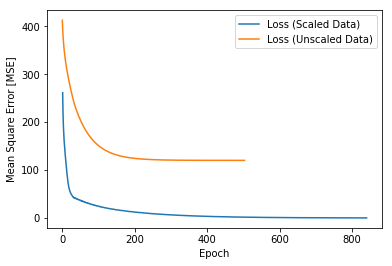

Unscaled History 


,epoch,loss
0,1,412.509363
1,2,394.681072
2,3,380.758204
3,4,369.437769
4,5,359.923022
5,6,351.703799
6,7,344.440894
7,8,337.901571
8,9,331.921827
9,10,326.383413


Scaled History 


,epoch,loss
0,1,261.305517
1,2,218.511338
2,3,192.920370
3,4,175.429138
4,5,162.183713
5,6,151.266530
6,7,141.626628
7,8,132.664414
8,9,124.050052
9,10,115.635494


In [0]:
#Testing---------------------------------   
_activation = 0     
input_dim = 2
output_dim = 1
model = ModelNet( input_dim )
model.addLayer( 2, 'relu' )
model.addLayer( output_dim, 'linear' )

(X, y_true ) = get_data( "D2_N3_Y1_UNSCALED")

max_epoch = 4000
learning_rate = 0.01

print("Training with scaled data----------------")
standardizer = standardizer()
X_S = standardizer.standardize( X )
model.fit( X_S, y_true, max_epoch, learning_rate = learning_rate , verbose=0)
history_scaled = model.get_history()

print("Training with unscaled data----------------")
model.fit( X, y_true, max_epoch, learning_rate = learning_rate , early_stop = 1, verbose=0)
history_unscaled = model.get_history()

#Plotting
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [MSE]')
plt.plot(history_scaled['epoch'], history_scaled['loss'], label='Loss (Scaled Data)')
plt.plot(history_unscaled['loss'], label='Loss (Unscaled Data)')
#plt.ylim([0,50])  
plt.legend()
plt.show()
      
print("Unscaled History ")
display ( history_unscaled.head ( 10 ))
print("Scaled History ")
display ( history_scaled.head ( 10 ))